In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

The diabetes dataset.
The built-in diabetes dataset includes 442 samples of data around diabetes, with 10 feature variables, some of which include:
age: age in years
bmi: body mass index
bp: average blood pressure
s1 tc: T-Cells (a type of white blood cells).

Now, load up the X and y data.
🎓 Remember, this is supervised learning, and we need a named 'y' target.

In [6]:
# Load the diabetes dataset by calling load_diabetes(). 
# The input return_X_y=True signals that X will be a data matrix, and y will be the regression target.
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


Next, select a portion of this dataset to plot by selecting the 3rd column of the dataset. You can do this by using the : operator to select all rows, and then selecting the 3rd column using the index (2). You can also reshape the data to be a 2D array - as required for plotting - by using reshape(n_rows, n_columns). If one of the parameter is -1, the corresponding dimension is calculated automatically

In [ ]:
X = X[:, 2]
X = X.reshape((-1,1))


(442, 1)
[0.06169621]


Now that you have data ready to be plotted, you can see if a machine can help determine a logical split between the numbers in this dataset. To do this, you need to split both the data (X) and the target (y) into test and training sets. Scikit-learn has a straightforward way to do this; you can split your test data at a given point.

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

Now you are ready to train your model! Load up the linear regression model and train it with your X and y training sets using model.fit():

In [9]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Then, create a prediction using test data, using the function predict(). This will be used to draw the line between data groups

In [10]:
y_pred = model.predict(X_test)

Now it's time to show the data in a plot. Matplotlib is a very useful tool for this task. Create a scatterplot of all the X and y test data, and use the prediction to draw a line in the most appropriate place, between the model's data groupings.

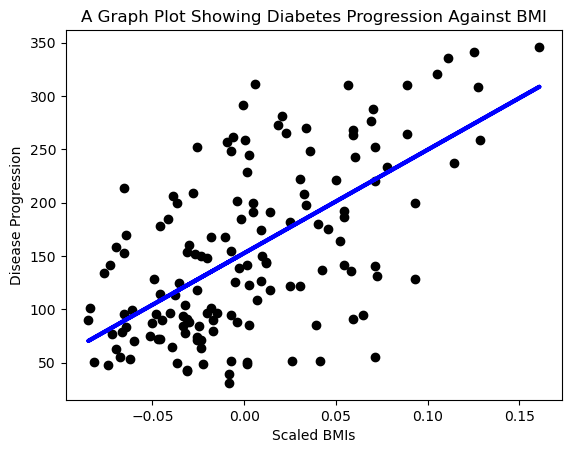

In [11]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()

✅ Think a bit about what's going on here. A straight line is running through many small dots of data, but what is it doing exactly? Can you see how you should be able to use this line to predict where a new, unseen data point should fit in relationship to the plot's y axis? Try to put into words the practical use of this model.

Take a look at the Linnerud dataset in Scikit-learn. This dataset has multiple targets: 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

In your own words, describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished. Do the same for the other datapoints in this dataset.

    Chins  Situps  Jumps  Weight  Waist  Pulse
0     5.0   162.0   60.0   191.0   36.0   50.0
1     2.0   110.0   60.0   189.0   37.0   52.0
2    12.0   101.0  101.0   193.0   38.0   58.0
3    12.0   105.0   37.0   162.0   35.0   62.0
4    13.0   155.0   58.0   189.0   35.0   46.0
5     4.0   101.0   42.0   182.0   36.0   56.0
6     8.0   101.0   38.0   211.0   38.0   56.0
7     6.0   125.0   40.0   167.0   34.0   60.0
8    15.0   200.0   40.0   176.0   31.0   74.0
9    17.0   251.0  250.0   154.0   33.0   56.0
10   17.0   120.0   38.0   169.0   34.0   50.0
11   13.0   210.0  115.0   166.0   33.0   52.0
12   14.0   215.0  105.0   154.0   34.0   64.0
13    1.0    50.0   50.0   247.0   46.0   50.0
14    6.0    70.0   31.0   193.0   36.0   46.0
15   12.0   210.0  120.0   202.0   37.0   62.0
16    4.0    60.0   25.0   176.0   37.0   54.0
17   11.0   230.0   80.0   157.0   32.0   52.0
18   15.0   225.0   73.0   156.0   33.0   54.0
19    2.0   110.0   43.0   138.0   33.0   68.0


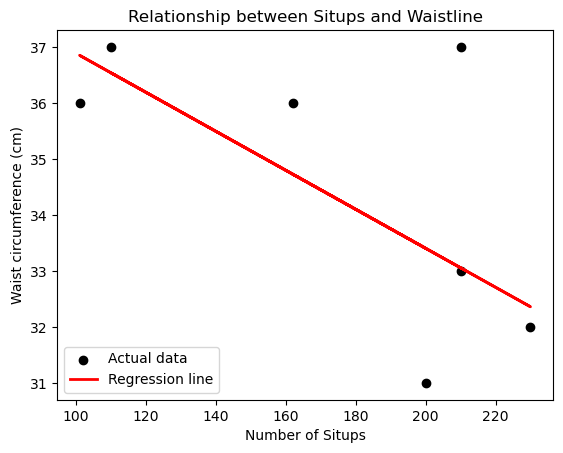

In [30]:
X, y = datasets.load_linnerud(return_X_y=True)
#print(X.shape)
#print(X[0])
#print(X)
data = datasets.load_linnerud()
#print(data.target_names)
#print(data.feature_names)
import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=data.target_names)
print(pd.concat([df, df_y], axis=1))

# CORRECTED: Select "Waist" from targets (y) and "Situps" from features (X)
X_situps = X[:, 1].reshape(-1, 1)  # Situps is index 1 in features
y_waist = y[:, 1]                  # Waist is index 1 in targets

# Split into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_waist, test_size=0.33, random_state=42)

# Create and train the regression model
model_situps_waist = linear_model.LinearRegression()
model_situps_waist.fit(X_train, y_train)

# Predict waist from situps in test set
y_pred = model_situps_waist.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Number of Situps')
plt.ylabel('Waist circumference (cm)')
plt.title('Relationship between Situps and Waistline')
plt.legend()
plt.show()



=== 1. Predicting Weight from Situps ===


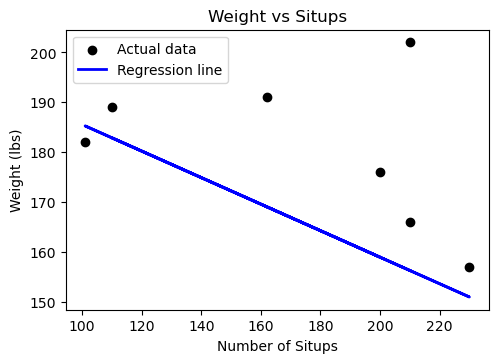

In [31]:
# 1. Predict Weight from Situps
print("\n=== 1. Predicting Weight from Situps ===")
X_situps = X[:, 1].reshape(-1, 1)  # Situps
y_weight = y[:, 0]                 # Weight

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_situps, y_weight, test_size=0.33, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Regression line')
plt.xlabel('Number of Situps')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Situps')
plt.legend()


=== 3. Predicting Pulse from Jumps ===


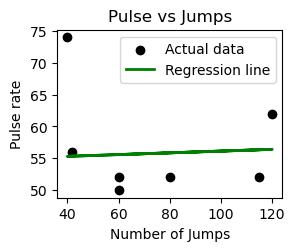

In [32]:
# 3. Predict Pulse from Jumps
print("\n=== 3. Predicting Pulse from Jumps ===")
X_jumps = X[:, 2].reshape(-1, 1)  # Jumps
y_pulse = y[:, 2]                 # Pulse

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_jumps, y_pulse, test_size=0.33, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression line')
plt.xlabel('Number of Jumps')
plt.ylabel('Pulse rate')
plt.title('Pulse vs Jumps')
plt.legend()